МІНІСТЕРСТВО ОСВІТИ І НАУКИ, МОЛОДІ ТА СПОРТУ УКРАЇНИ
НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
«КИЇВСЬКИЙ ПОЛІТИХНІЧНИЙ ІНСТИТУТ ІМ.ІГОРЯ СІКОРСЬКОГО»
ФІЗИКО-ТЕХНІЧНИЙ ІНСТИТУТ


Лабораторна робота №1
«Геометричні перетворення координат на площині»
Варіант 9





Виконав:                                                                     Студент 2 курсу
     Групи ФІ-21
Климентьєв Максим




Київ 2024

1. Ознайомитись з теоретичними відомостями до лабораторної роботи. Дослідити кожне перетворення (перетворення, масштабування, поворот, відображення тощо) та їхні комбінації на площину.
2. Задати вершини довільного опуклого 8-кутника на площині. Зменшити його в 1,5 рази.
3. Отриманий результат з попереднього пункту симетрично відобразити відносно початку координат.
4. Задати похилу пряму двома точками на площині. Симетрично відобразити 8-кутник відносно даної прямої. Вказати перетворення, які для цього необхідні. 
5. Розробити програмне забезпечення (середовище розробки та мова програмування за вибором студента) для виконання пунктів 2–4. Результат виконання кожного пункту показати в окремому графічному вікні.
6. Виконати пункти 2–4 для одного будь-якого графічного об’єкту, який подано в xlsx-файлі.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Zone for Task 5

#### 5 Задати вершини довільного опуклого 8-кутника на площині

In [2]:
xy = np.array([[1.5, 1], 
                [1, 1.5], 
                [1, 2.5], 
                [1.5, 3], 
                [2.5, 3], 
                [3, 2.5], 
                [3, 1.5], 
                [2.5, 1],
                [1.5, 1]])
modificator_height = 0.14


#### 5.0 Задати вершини довільного опуклого 8-кутника на площині

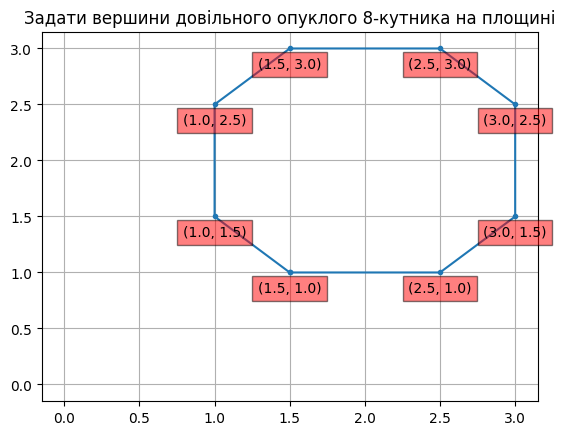

In [3]:
plt.plot(xy[:, 0], xy[:, 1], ".-",0, 0)

for i in range(xy.shape[0]-1):
    xi, yi = xy[i]
    plt.text(xi, yi-modificator_height, f'({xi}, {yi})', horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='red', alpha=0.5))

plt.grid()
plt.title("Задати вершини довільного опуклого 8-кутника на площині")
plt.show()

#### 5.1 Зменшити його в 1,5 рази.

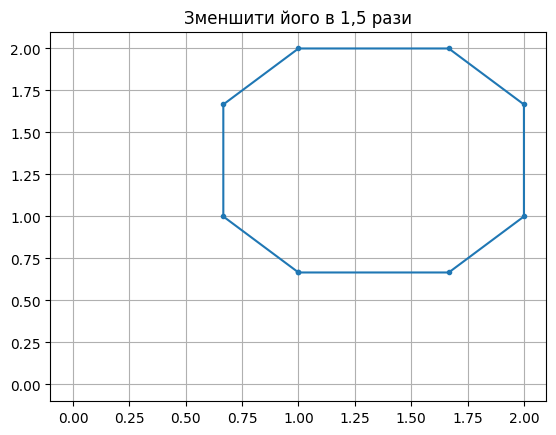

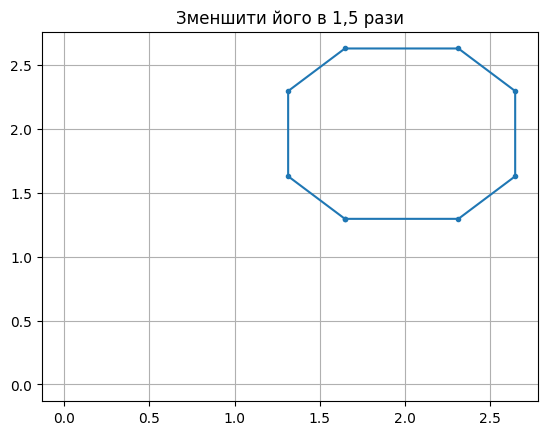

In [4]:
xy_05 = np.zeros_like(xy)
for i in range(xy.shape[0]):
    xy_05[i] = xy[i] * np.matrix([[2/3, 0], [0, 2/3]])
plt.plot(xy_05[:, 0], xy_05[:, 1], ".-", 0, 0)

# for i in range(xy_05.shape[0]-1):
#     xi, yi = xy_05[i]
#     plt.text(xi, yi-modificator_height*0.5, f'({xi}, {yi})', horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='red', alpha=0.5))

plt.grid()
plt.title("Зменшити його в 1,5 рази")
plt.show()

xy_3d = np.column_stack((xy, np.array([1]*xy.shape[0])))
xy_05 = np.zeros_like(xy_3d)
central_dot = np.array([np.mean(xy_3d[:, 0]), np.mean(xy_3d[:, 1])])
for i in range(xy_05.shape[0]):
    xy_05[i] = xy_3d[i] * np.matrix([[1, 0, 0], 
                                     [0, 1, 0], 
                                     [-central_dot[0], -central_dot[1], 1]])
    xy_05[i] = xy_05[i] * np.matrix([[2/3, 0, 0],
                                     [0, 2/3, 0],
                                     [0, 0, 1]])
    xy_05[i] = xy_05[i] * np.matrix([[1, 0, 0], 
                                     [0, 1, 0], 
                                     [central_dot[0], central_dot[1], 1]])
plt.plot(xy_05[:, 0], xy_05[:, 1], ".-", 0, 0)

plt.grid()
plt.title("Зменшити його в 1,5 рази")
plt.show()

#### 5.2 Симетрично відобразити відносно початку координат.

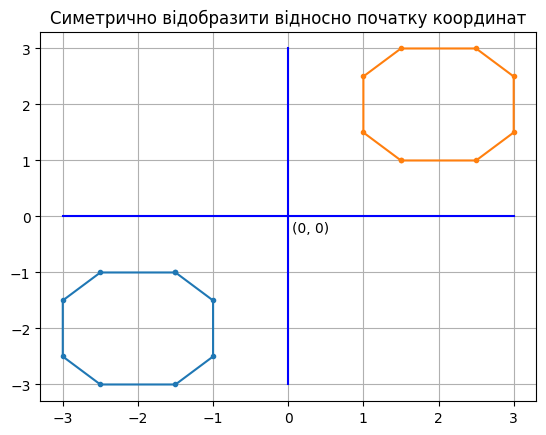

In [5]:
xy_reverse = np.zeros_like(xy)
for i in range(xy.shape[0]):
    xy_reverse[i] = xy[i] * np.matrix([[-1, 0], [0, -1]])
plt.plot(xy_reverse[:, 0], xy_reverse[:, 1], ".-", [-3, 3], [0, 0], "b")
plt.plot(xy[:, 0], xy[:, 1], ".-", [0, 0], [-3, 3], "b")
plt.text(0.3, -0.2, "(0, 0)", horizontalalignment='center', verticalalignment='center')

plt.grid()
plt.title("Cиметрично відобразити відносно початку координат")
plt.show()

#### 5.3 Задати похилу пряму двома точками на площині. Симетрично відобразити 8-кутник відносно даної прямої. Вказати перетворення, які для цього необхідні.

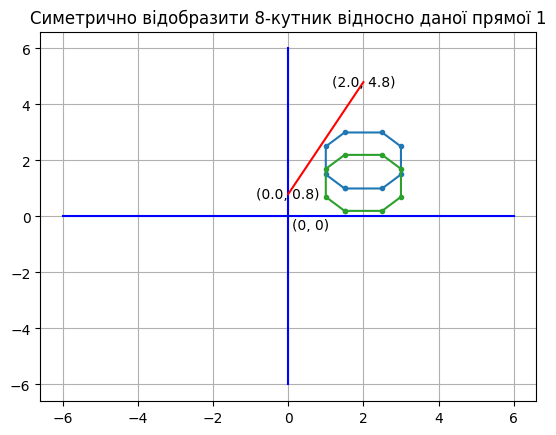

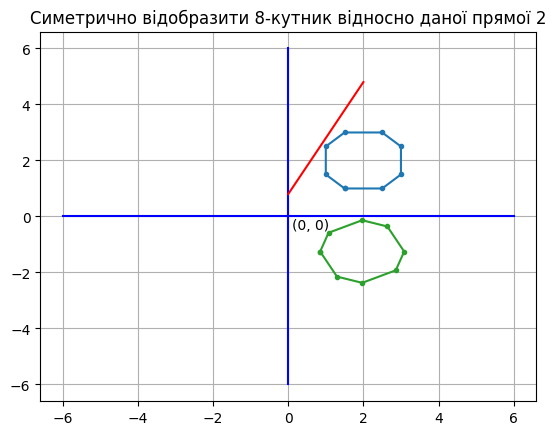

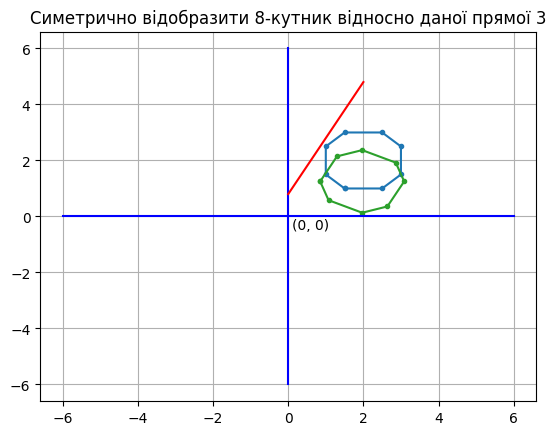

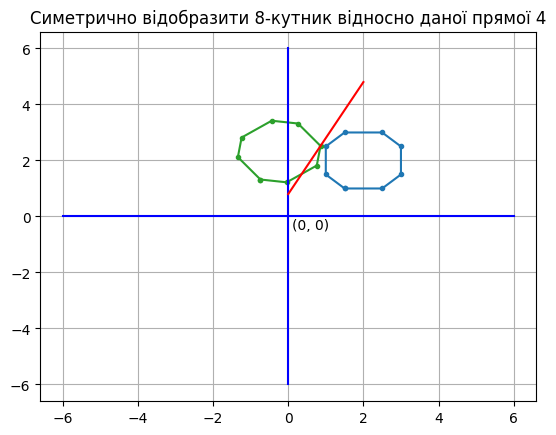

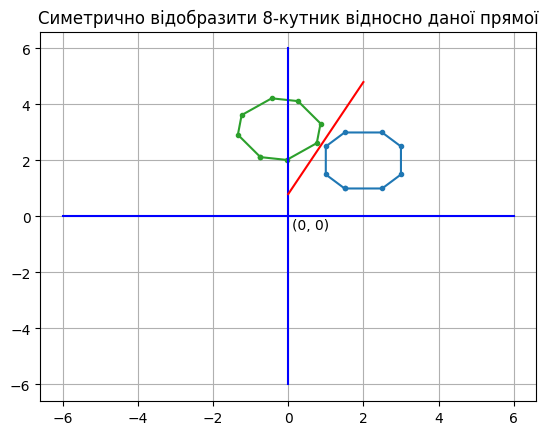

In [6]:
plt.plot([-6, 6], [0, 0], "b")
plt.plot([0, 0], [-6, 6], "b")
plt.text(0.6, -0.3, "(0, 0)", horizontalalignment='center', verticalalignment='center')


xn, yn = [0, 2], [0.8, 4.8]
xyn = np.array([[xn[0], yn[0]], [xn[1], yn[1]]])
# k = 2
# b = 0.8
# x = np.linspace(-2, 3)
# y = k*x + b
# plt.plot(x, y, 'r', xn, yn, "green")
plt.plot(xn, yn, "r")

for i in range(xyn.shape[0]):
    xi, yi = xyn[i]
    plt.text(xi, yi-modificator_height, f'({xi}, {yi})', horizontalalignment='center')

plt.plot(xy[:, 0], xy[:, 1], ".-",0, 0)

km = (yn[1]-yn[0])/(xn[1]-xn[0])
bm = yn[0] - xn[0]*(yn[1]-yn[0])/(xn[1]-xn[0])
phi = np.arctan(km)

xy_3d = np.column_stack((xy, np.array([1]*xy.shape[0])))
xy_sym = np.zeros_like(xy_3d)
for i in range(xy_sym.shape[0]):
    xy_sym[i] = xy_3d[i] * np.matrix([[1, 0, 0], 
                                      [0, 1, 0], 
                                      [0, -bm, 1]])
plt.plot(xy_sym[:, 0], xy_sym[:, 1], ".-")
plt.grid()
plt.title("Симетрично відобразити 8-кутник відносно даної прямої 1")
plt.show()
for i in range(xy_sym.shape[0]):
    xy_sym[i] = xy_sym[i] * np.matrix([[np.cos(-phi), np.sin(-phi), 0], 
                                      [-np.sin(-phi), np.cos(-phi), 0], 
                                      [0, 0, 1]])
plt.plot(xy[:, 0], xy[:, 1], ".-",0, 0)
plt.plot(xy_sym[:, 0], xy_sym[:, 1], ".-")
plt.plot([-6, 6], [0, 0], "b")
plt.plot([0, 0], [-6, 6], "b")
plt.text(0.6, -0.3, "(0, 0)", horizontalalignment='center', verticalalignment='center')
plt.plot(xn, yn, "r")
plt.grid()
plt.title("Симетрично відобразити 8-кутник відносно даної прямої 2")
plt.show()
for i in range(xy_sym.shape[0]):
    xy_sym[i] = xy_sym[i] * np.matrix([[1, 0, 0], 
                                      [0, -1, 0], 
                                      [0, 0, 1]])
plt.plot(xy[:, 0], xy[:, 1], ".-",0, 0)
plt.plot(xy_sym[:, 0], xy_sym[:, 1], ".-")
plt.plot([-6, 6], [0, 0], "b")
plt.plot([0, 0], [-6, 6], "b")
plt.text(0.6, -0.3, "(0, 0)", horizontalalignment='center', verticalalignment='center')
plt.plot(xn, yn, "r")
plt.grid()
plt.title("Симетрично відобразити 8-кутник відносно даної прямої 3")
plt.show()
for i in range(xy_sym.shape[0]):
    xy_sym[i] = xy_sym[i] * np.matrix([[np.cos(phi), np.sin(phi), 0], 
                                      [-np.sin(phi), np.cos(phi), 0], 
                                      [0, 0, 1]])
plt.plot(xy[:, 0], xy[:, 1], ".-",0, 0)
plt.plot(xy_sym[:, 0], xy_sym[:, 1], ".-")
plt.plot([-6, 6], [0, 0], "b")
plt.plot([0, 0], [-6, 6], "b")
plt.text(0.6, -0.3, "(0, 0)", horizontalalignment='center', verticalalignment='center')
plt.plot(xn, yn, "r")
plt.grid()
plt.title("Симетрично відобразити 8-кутник відносно даної прямої 4")
plt.show()
for i in range(xy_sym.shape[0]):
    xy_sym[i] = xy_sym[i] * np.matrix([[1, 0, 0], 
                                      [0, 1, 0], 
                                      [0, bm, 1]])
plt.plot(xy[:, 0], xy[:, 1], ".-",0, 0)
plt.plot(xy_sym[:, 0], xy_sym[:, 1], ".-")
plt.plot([-6, 6], [0, 0], "b")
plt.plot([0, 0], [-6, 6], "b")
plt.text(0.6, -0.3, "(0, 0)", horizontalalignment='center', verticalalignment='center')
plt.plot(xn, yn, "r")

plt.grid()
plt.title("Симетрично відобразити 8-кутник відносно даної прямої")
plt.show()

### Zone for Task 6

In [7]:
xls = pd.read_excel("lab1/Варіанти.xlsx", "Var_02")

#### 6.0

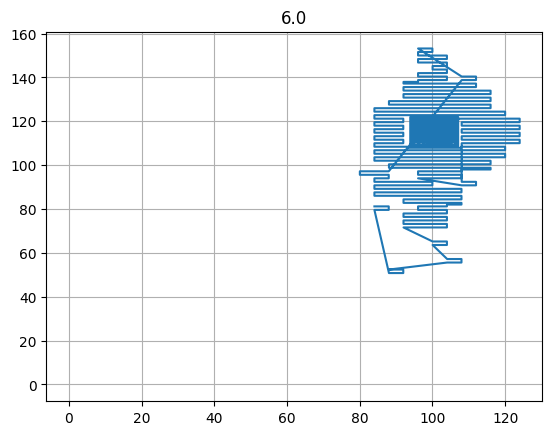

In [8]:
plt.plot(xls["X"], xls["Y"], 0, 0)
plt.grid()
plt.title("6.0")
plt.show()

#### 6.1 Зменшити його в 1,5 рази.

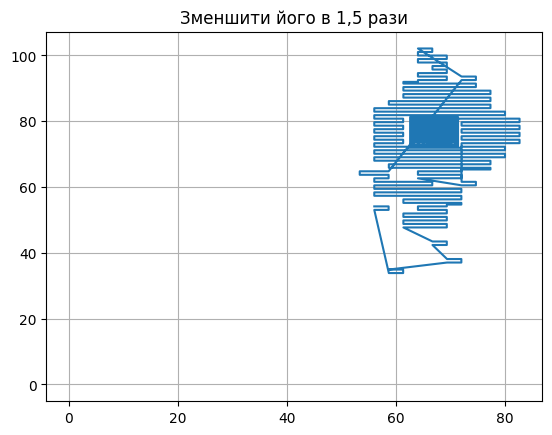

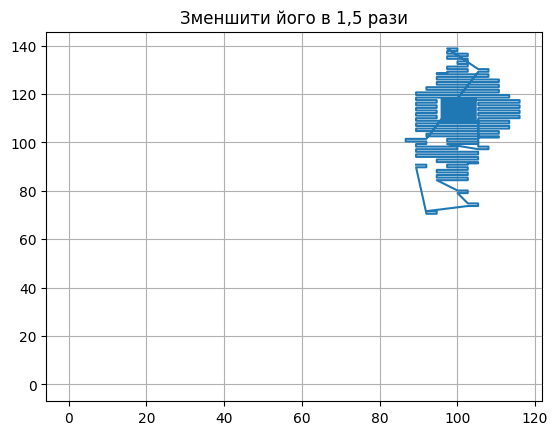

In [9]:
xls_05 = xls.values.copy()
for i in range(xls.shape[0]):
    xls_05[i] = xls.values[i] * np.matrix([[2/3, 0], [0, 2/3]])
plt.plot(xls_05[:, 0], xls_05[:, 1], "-", 0, 0)

plt.grid()
plt.title("Зменшити його в 1,5 рази")
plt.show()


xls_3d = np.column_stack((xls.values, np.array([1]*xls.values.shape[0])))
xls_05 = xls_3d.copy()
central_dot = np.array([np.mean(xls_05[:, 0]), np.mean(xls_05[:, 1])])
for i in range(xls_05.shape[0]):
    xls_05[i] = xls_3d[i] * np.matrix([[1, 0, 0], 
                                      [0, 1, 0], 
                                      [-central_dot[0], -central_dot[1], 1]])
    xls_05[i] = xls_05[i] * np.matrix([[2/3, 0, 0],
                                       [0, 2/3, 0],
                                       [0, 0, 1]])
    xls_05[i] = xls_05[i] * np.matrix([[1, 0, 0], 
                                       [0, 1, 0], 
                                       [central_dot[0], central_dot[1], 1]])
plt.plot(xls_05[:, 0], xls_05[:, 1], "-", 0, 0)

plt.grid()
plt.title("Зменшити його в 1,5 рази")
plt.show()

#### 6.2 симетрично відобразити відносно початку координат.

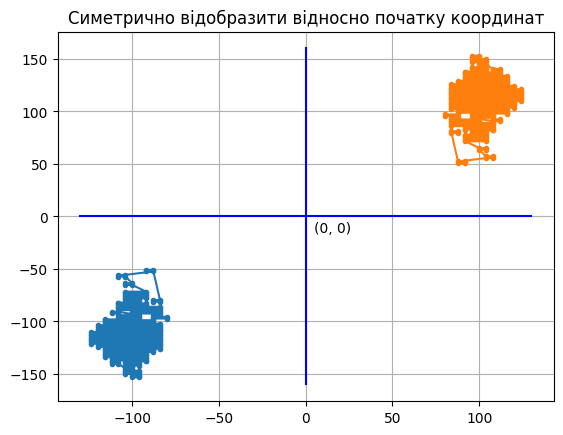

In [10]:
xls_reverse = xls.values.copy()
for i in range(xls_reverse.shape[0]):
    xls_reverse[i] = xls.values[i] * np.matrix([[-1, 0], [0, -1]])
plt.plot(xls_reverse[:, 0], xls_reverse[:, 1], ".-", [-130, 130], [0, 0], "b")
plt.plot(xls["X"], xls["Y"], ".-", [0, 0], [-160, 160], "b")
plt.text(5, -15, "(0, 0)")

plt.grid()
plt.title("Cиметрично відобразити відносно початку координат")
plt.show()

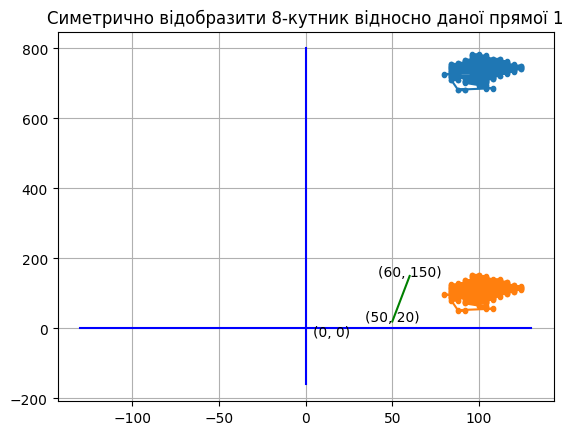

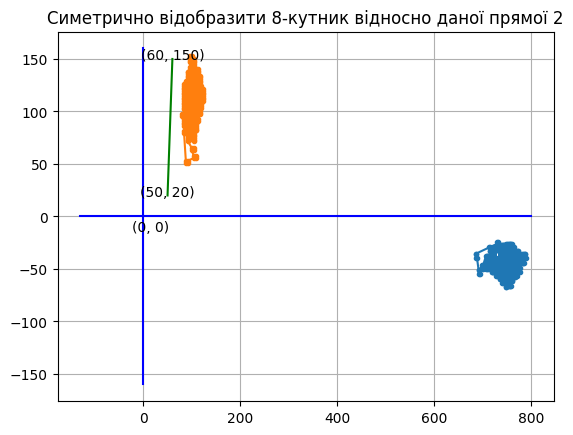

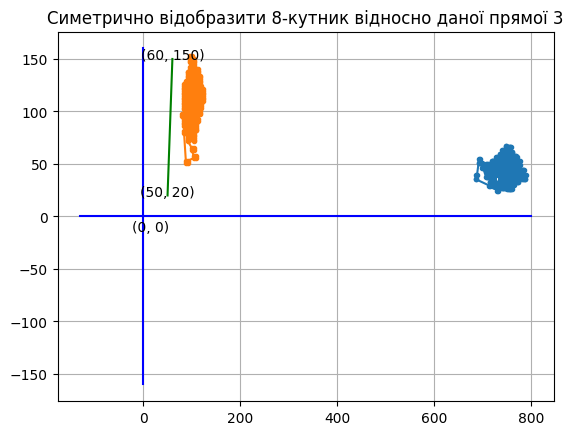

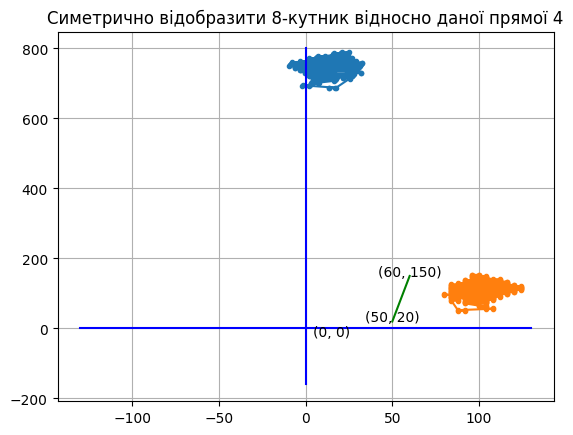

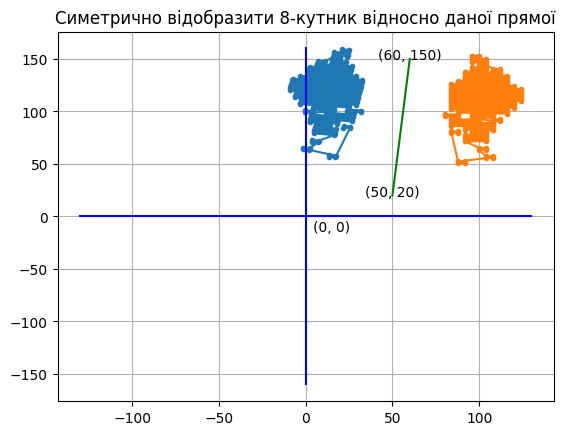

In [11]:
xn, yn = [50, 60], [20, 150]
xyn = np.array([[xn[0], yn[0]], [xn[1], yn[1]]])
# k = 2
# b = 0.8
# x = np.linspace(-2, 3)
# y = k*x + b
# plt.plot(x, y, 'r', xn, yn, "green")
plt.plot(xn, yn, "green")

for i in range(xyn.shape[0]):
    xi, yi = xyn[i]
    plt.text(xi, yi-modificator_height, f'({xi}, {yi})', horizontalalignment='center')

xy_3d = np.column_stack((xy, np.array([1]*xy.shape[0])))

km = (yn[1]-yn[0])/(xn[1]-xn[0])
bm = yn[0] - xn[0]*(yn[1]-yn[0])/(xn[1]-xn[0])
phi = np.arctan(km)

xls_3d = np.column_stack((xls.values, np.array([1]*xls.values.shape[0])))
xls_sym = xls_3d.copy()
for i in range(xls_sym.shape[0]):
    xls_sym[i] = xls_3d[i] * np.matrix([[1, 0, 0], 
                                      [0, 1, 0], 
                                      [0, -bm, 1]])
plt.plot(xls_sym[:, 0], xls_sym[:, 1], ".-", [-130, 130], [0, 0], "b")
plt.plot(xls["X"], xls["Y"], ".-", [0, 0], [-160, 800], "b")
plt.text(15, -10, "(0, 0)", horizontalalignment='center', verticalalignment='center')

plt.grid()
plt.title("Симетрично відобразити 8-кутник відносно даної прямої 1")
plt.show()
for i in range(xls_sym.shape[0]):
    xls_sym[i] = xls_sym[i] * np.matrix([[np.cos(-phi), np.sin(-phi), 0], 
                                      [-np.sin(-phi), np.cos(-phi), 0], 
                                      [0, 0, 1]])
plt.plot(xls_sym[:, 0], xls_sym[:, 1], ".-", [-130, 800], [0, 0], "b")
plt.plot(xls["X"], xls["Y"], ".-", [0, 0], [-160, 160], "b")
plt.text(15, -10, "(0, 0)", horizontalalignment='center', verticalalignment='center')
plt.plot(xn, yn, "green")
for i in range(xyn.shape[0]):
    xi, yi = xyn[i]
    plt.text(xi, yi-modificator_height, f'({xi}, {yi})', horizontalalignment='center')

plt.grid()
plt.title("Симетрично відобразити 8-кутник відносно даної прямої 2")
plt.show()
for i in range(xls_sym.shape[0]):
    xls_sym[i] = xls_sym[i] * np.matrix([[1, 0, 0], 
                                      [0, -1, 0], 
                                      [0, 0, 1]])
plt.plot(xls_sym[:, 0], xls_sym[:, 1], ".-", [-130, 800], [0, 0], "b")
plt.plot(xls["X"], xls["Y"], ".-", [0, 0], [-160, 160], "b")
plt.text(15, -10, "(0, 0)", horizontalalignment='center', verticalalignment='center')
plt.plot(xn, yn, "green")
for i in range(xyn.shape[0]):
    xi, yi = xyn[i]
    plt.text(xi, yi-modificator_height, f'({xi}, {yi})', horizontalalignment='center')

plt.grid()
plt.title("Симетрично відобразити 8-кутник відносно даної прямої 3")
plt.show()
for i in range(xls_sym.shape[0]):
    xls_sym[i] = xls_sym[i] * np.matrix([[np.cos(phi), np.sin(phi), 0], 
                                      [-np.sin(phi), np.cos(phi), 0], 
                                      [0, 0, 1]])
plt.plot(xls_sym[:, 0], xls_sym[:, 1], ".-", [-130, 130], [0, 0], "b")
plt.plot(xls["X"], xls["Y"], ".-", [0, 0], [-160, 800], "b")
plt.text(15, -10, "(0, 0)", horizontalalignment='center', verticalalignment='center')
plt.plot(xn, yn, "green")
for i in range(xyn.shape[0]):
    xi, yi = xyn[i]
    plt.text(xi, yi-modificator_height, f'({xi}, {yi})', horizontalalignment='center')

plt.grid()
plt.title("Симетрично відобразити 8-кутник відносно даної прямої 4")
plt.show()
for i in range(xls_sym.shape[0]):
    xls_sym[i] = xls_sym[i] * np.matrix([[1, 0, 0], 
                                      [0, 1, 0], 
                                      [0, bm, 1]])
plt.plot(xn, yn, "green")
for i in range(xyn.shape[0]):
    xi, yi = xyn[i]
    plt.text(xi, yi-modificator_height, f'({xi}, {yi})', horizontalalignment='center')

plt.plot(xls_sym[:, 0], xls_sym[:, 1], ".-", [-130, 130], [0, 0], "b")
plt.plot(xls["X"], xls["Y"], ".-", [0, 0], [-160, 160], "b")
plt.text(15, -10, "(0, 0)", horizontalalignment='center', verticalalignment='center')

plt.grid()
plt.title("Симетрично відобразити 8-кутник відносно даної прямої")
plt.show()